# **TFG Manuel García González: evaluación y comparación de resutados con librería Evaluate**

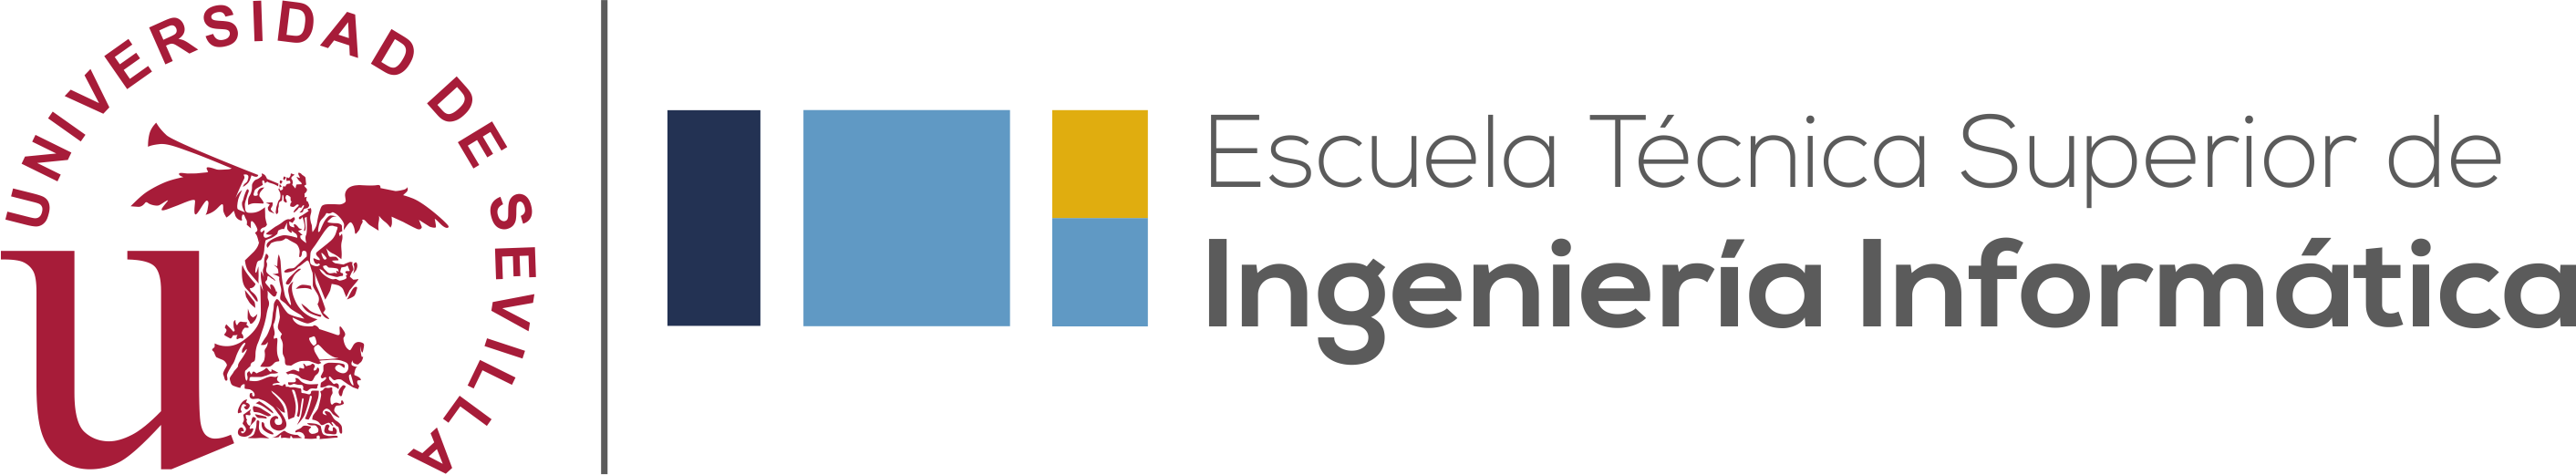

### **Importante: No ejecutar el notebook.**

La librería Evaluate de Hugging Face es una herramienta diseñada para facilitar la evaluación de modelos de aprendizaje automático, especialmente en el ámbito del procesamiento de lenguaje natural (NLP). Su propósito principal es proporcionar un marco estandarizado y fácil de usar para calcular diversas métricas de evaluación, permitiendo a los desarrolladores e investigadores evaluar el rendimiento de sus modelos de manera efectiva y comparativa.

En este caso, queremos comprobar las diferencias entre los modelos entrenados, y buscar si los datos obtenidos en el paper de presentación del modelo DistilBERT, casan con lo que hemos obtenido, y si mejora los resultados frente al BERT (*Sanh, V., Debut, L., Chaumond, J., & Wolf, T. (2019). DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. arXiv preprint arXiv:1910.01108.*). Estos resultados discutidos en el artículo serán comparados con nuestro análisis, y se realizará una valoración de la experimentación llevada a cabo.


En primer lugar, debemos de conocer en profundidad que es Evaluate, y que nos permite llevar a cabo en la fase de evaluación de modelos. Hay diferentes aspectos de un pipeline típico de machine learning que pueden ser evaluados. La presente librería tiene en cuenta 3 de ellos:


1.   **Métricas del modelo**: Una métrica mide el rendimiento de un modelo en un conjunto de datos determinado. Algunos ejemplos de métricas son:

  * **Accuracy**: es la proporción de predicciones correctas entre el número total de casos procesados. Accuracy = (TP + TN) / (TP + TN + FP + FN) Donde: TP: Verdadero positivo TN: Verdadero negativo FP: Falso positivo FN: Falso negativo
  * **Precission**: es la fracción de ejemplos positivos etiquetados correctamente de todos los ejemplos etiquetados como positivos. Se calcula mediante la ecuación Precisión = TP / (TP + FP) donde TP son los Verdaderos positivos (es decir, los ejemplos etiquetados correctamente como positivos) y FP son los Ejemplos falsos positivos (es decir, los ejemplos etiquetados incorrectamente como positivos).
  * **F1-score**: Es la media armónica de la precisión y la recuperación. Es especialmente útil en situaciones donde hay un desequilibrio entre las clases positivas y negativas. El F1-score proporciona una única métrica que equilibra ambos aspectos del rendimiento del modelo. F1 = 2 * (precision * recall) / (precision + recall)
  * **Recall**: Mide la proporción de verdaderos positivos entre todos los positivos reales. Indica qué porcentaje de las instancias positivas reales han sido capturadas por el modelo. Recall = TP / (TP + FN)
  * **Latency**: el tiempo que tarda en ejecutarse una operación específica, generalmente una inferencia o una predicción, en segundos.

2. **Comparación de modelos**: Las comparaciones pueden ser útiles para comparar el rendimiento de dos o más modelos en un único conjunto de datos de prueba.

  Por ejemplo, la prueba de **McNemar** es una prueba de hipótesis estadística no paramétrica por pares que toma las predicciones de dos modelos y las compara, con el objetivo de medir si las predicciones de los modelos divergen o no. El valor p que arroja, que oscila entre 0,0 y 1,0, indica la diferencia entre las predicciones de los dos modelos, y un valor p más bajo indica una diferencia más significativa.

  Las comparaciones aún no se han utilizado sistemáticamente a la hora de comparar e informar sobre el rendimiento de los modelos, sin embargo, son herramientas útiles para ir más allá de la simple comparación de las puntuaciones de las tablas de clasificación y para obtener más información sobre la forma en que difieren las predicciones de los modelos.

3. **Medición del dataset**: El conjunto de datos es tan importante como el modelo entrenado en él. Con las mediciones se pueden investigar las propiedades de un conjunto de datos. En este caso concreto, la información del dataset no va a ser evaluada.

Una vez conocido y acotado la información a tener en cuenta en el proceso de evaluación de los modelos, se ha diagnosticado que, para comprobar las afirmaciones planteadas en el artículo, se han de evaluar varias métricas en ambos modelos, y así validar los resultados.

Para ello, se ha de realizar la instalación de librerías y configuración necesaria:



In [ ]:
pip install transformers

In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
pip install datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 25.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate

#.

Tras la instalación necesaria, se ha comenzado con el desarrollo de la prueba. Para ello, se ha implementado el siguiente extracto inicial de código, donde se han inicializad los parámetros de entrada que toma la clase evaluator() posteriormente. Los parámetros, han sido:

* Crear un Pipeline de Clasificación de Texto: Se especifica que el pipeline es para la clasificación de texto, y se deja indicado el modelo que debe realizar dicha tarea. En este primer caso, es el modelo DistilBert, y en el segundo es el BERT.

* Cargar y Preparar el conjunto de datos: se carga el conjunto de datos IMDB para la tarea de clasificación de sentimientos, utilizando solo la parte de prueba (test). Para ello, mezcla aleatoriamente los datos para evitar cualquier sesgo de orden con el método shuffle(), y se selecciona un rango de 1000 ejemplos únicamente para la prueba, ya que es un rango válido para comprobar cómo funciona el modelo. En caso de restringir el número de ejemplos, puesto que el split "test" del dataset tiene 25.000 reseñas, se necesitaría mucha capacidad computacional.

* Combinar Métricas de Evaluación: se indican las métricas que se desean evaluar en la prueba. Por defecto, mide el accuricy y métricas de rendimiento en tiempo, como latency_in_seconds y samples_per_second. Nosotros, hemos añadido la medida f2, precision y recall.

Esto se repite para cada modelo, donde la única línea que cambia es en la definición del pipeline, el modelo empleado.


#.

In [ ]:
pipe1 = pipeline("text-classification", model="ManuGG/MGG_model_tclss")
data1 = load_dataset("imdb", split="test").shuffle().select(range(1000))
metric1 = evaluate.combine(["accuracy", "f1", "precision", "recall"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
pipe2 = pipeline("text-classification", model="ManuGG/Bert_textclass_MGG")
data2 = load_dataset("imdb", split="test").shuffle().select(range(1000))
metric2 = evaluate.combine(["accuracy", "f1", "precision", "recall"])

config.json:   0%|          | 0.00/859 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

#.

Seguidamente, ya se puede definir el objeto evaluator con los parámetros inicializados anteriormente. En primera instancia, se ha definir que el objeto evaluator será del tipo "text-classification".

Posteriormente, a través del método compute(), es posible realizar la evaluación del modelo o pipeline en el conjunto de datos especificado y calcula las métricas proporcionadas. Este método, a parte de los parámetros ya especificados, requiere la definición de un último parámetro llamado label_mapping, el cual proporciona el mapeo de etiquetas específico para que el evaluador pueda entender las etiquetas en el contexto de la clasificación de texto.

Posteriormente, se printean los datos por pantalla. Estos serán comentados más adelante.

#.

In [ ]:
task_evaluator = evaluator("text-classification")

results1 = task_evaluator.compute(model_or_pipeline=pipe1, data=data1, metric=metric1,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

print(results1)

{'accuracy': 0.926, 'f1': 0.9197396963123645, 'precision': 0.9658314350797267, 'recall': 0.8778467908902692, 'total_time_in_seconds': 422.021077042, 'samples_per_second': 2.369549897860857, 'latency_in_seconds': 0.42202107704200004}


In [ ]:
results2 = task_evaluator.compute(model_or_pipeline=pipe2, data=data2, metric=metric2,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

print(results2)

{'accuracy': 0.944, 'f1': 0.9450980392156862, 'precision': 0.9305019305019305, 'recall': 0.9601593625498008, 'total_time_in_seconds': 872.021329716, 'samples_per_second': 1.1467609402692938, 'latency_in_seconds': 0.872021329716}


#.
Finalmente, con las métricas ya obtenidas, podemos comenzar con la evaluación de los resultados y llegar a conclusiones concretas.

En este sentido, la propia librería, da la posibilidad de generar gráficos muy visuales para comparar las métricas obtenidas. Dichos gráficos, se pueden conseguir a través de los siguientes comandos.

#.

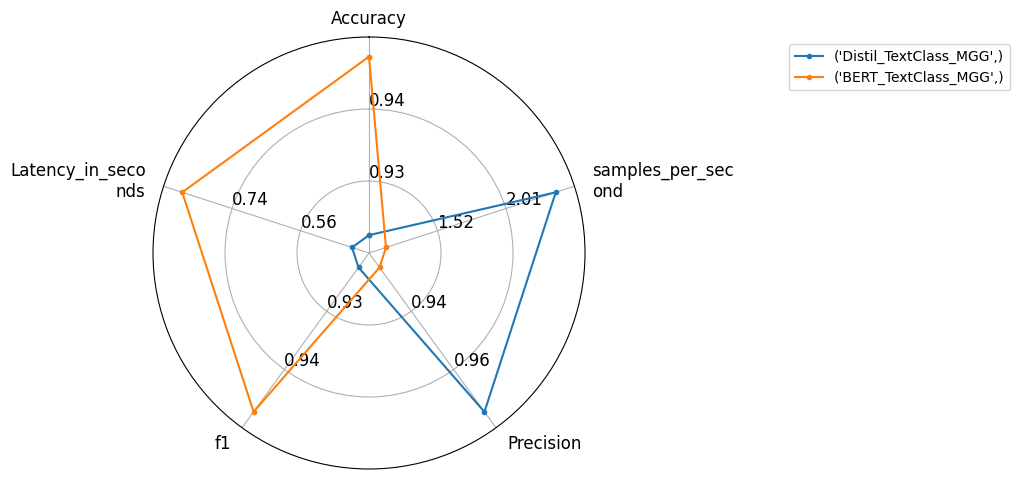

In [ ]:
from evaluate.visualization import radar_plot

data = [
   {"Accuracy": 0.926, 'samples_per_second': 2.369549897860857, "Precision": 0.9658, "f1": 0.9197, "Latency_in_seconds": 0.4220},
   {"Accuracy": 0.944, 'samples_per_second': 1.1467609402692938, "Precision": 0.9305, "f1": 0.9451, "Latency_in_seconds": 0.8720}
   ]
model_names = ["Distil_TextClass_MGG", "BERT_TextClass_MGG"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

Llegado el fin del proceso, podemos comenzar con la evaluación y estandarización de conclusiones. El artículo, dicta que el modelo DistilBert, supone una versión un 40% más pequeña en términos de parámetros de configuración, lo cual es cierto si visualizamos los parámetros de las clases de ambos modelos, como las clases de configuración (16 vs 13 parámetros). esta tónica se extiende en las diferentes clases del modelo, lo que respalda la reducción del tamaño del modelo DistilBERT frente a BERT:








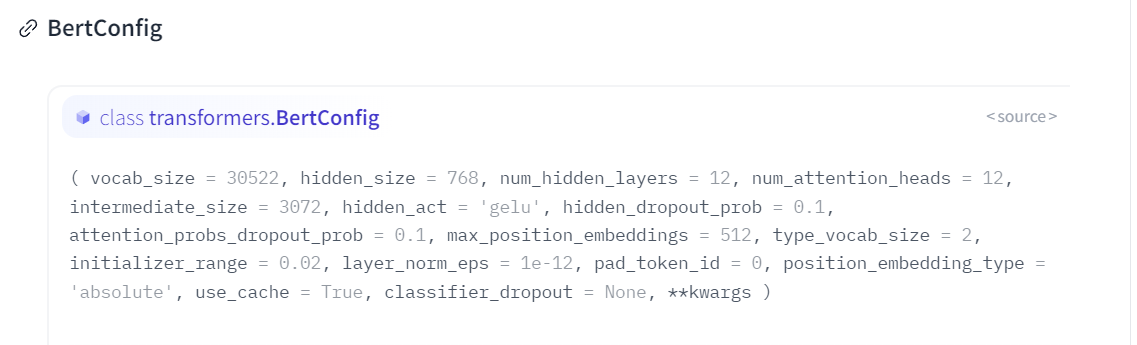

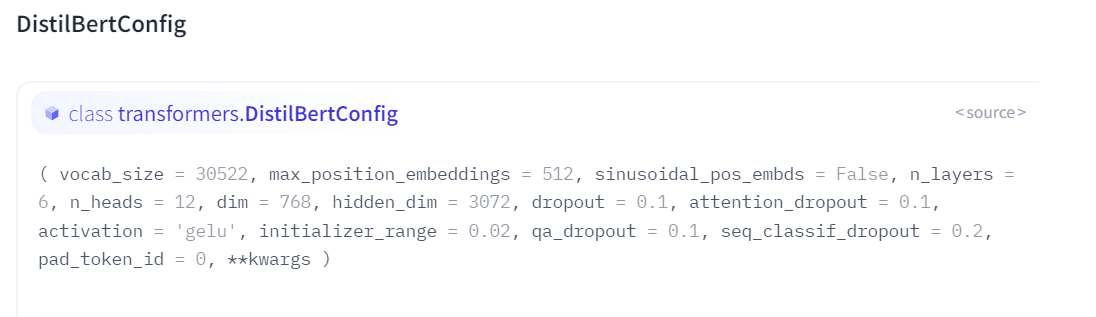

Es entendible, que esto se traduzca en una mejora del rendimiento a la hora de inferir respuestas, tal y como se explica en el artículo, cuya mejora supone hasta un 60% más de rapidez en la ejecución, como se expone en la tabla 3:

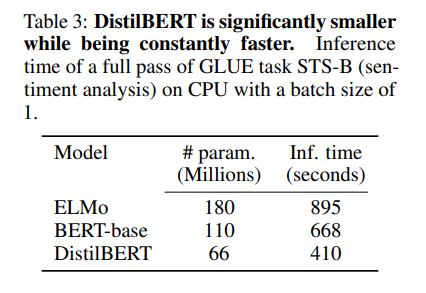

En la evaluación de parámetros que hemos realizado, podemos ver que los resultados obtenidos para cada modelo han sido los siguientes:

*   DistilBERT:
  * 'total_time_in_seconds': 422.021077042,
  * 'samples_per_second': 2.369549897860857,
  * 'latency_in_seconds': 0.42202107704200004

*   BERT
  * 'total_time_in_seconds': 872.021329716,
  * 'samples_per_second': 1.1467609402692938,
  * 'latency_in_seconds': 0.872021329716

La primera métrica muestra el tiempo total en ejecutar la muestra, así como la siguiente muestra cuantos ejemplos es capaz de procesar por segundo. La última de estas, mide cuanto tarda en medir una sola inferencia en segundos.

Estás métricas son proporcionales, y todas muestran que el modelo DistelBert es un **48,39% más eficiente** en este contexto de experimentación, frente al modelo BERT.

Estas conclusiones se quedan muy cerca de las obtenidas en el artículo, y respalda que los resultados obtenidos son válidos. Las razones por las que el rendimiento puede varias, se pueden resumir en tres:

* En este contexto, tan sólo se ha evaluado la tarea de Text-Classification. El artículo hace una investigación más inmersiva, y valida el rendimiento del modelo en varias tareas dentro del NPL, como son la evaluación de la aceptabilidad gramatical de oraciones, la capacidad de parafrasear, etc. Dichas tareas y sus resultados se recogen en la tabla 1:







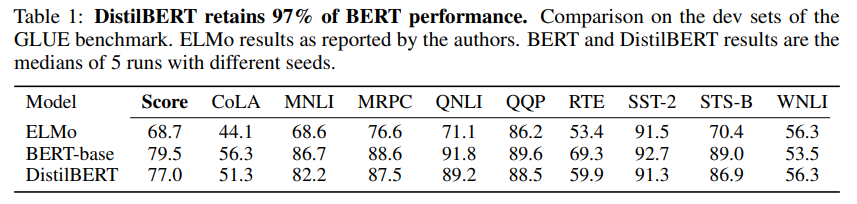




*   Los datasets de testeo están acotados en este contexto de experimentación, para mejorar el rendimiento y no obtener tiempos de ejecución tan amplios. Esto también restringe la evaluación del modelo frente a volúmenes de datos mayores, en los que el rendimiento puede verse afectado.

* Los datasets empleados no concuerdan, ya que pese a que en el artículo, también comenta que han empleado el dataset de IMDb para la realización de pruebas, el factor del método shuffle() hace que las reseñas evaluadas en este contexto de experimentación, no hayan sido las mismas que en el caso del artículo. Reseñas de mayor o menos tamaño, pueden conllevar variaciones en el análisis de métricas.

Conociendo la información anterior, se puede valorar que el rendimiento del DistilBERTvs. BERT está contrastado con la experimentación realizada en etos notebooks.










Por último, hay que avaluar los datos de capacidades de los modelos que se han obtenido. En primer lugar, se puede observar que el **Accuricy** del modelo DistilBERT en este contexto, es un **98,09%** del presnetado por el modelo BERT.

Esto quiere decir, que ha presentado casi las mismas capacidades que su predecesor, y dicho resultado es muy similar al 97% conseguido en el paper (se muestra a continuación, los reusltados de las mediciones de accuricy obtenidas en el artículo):



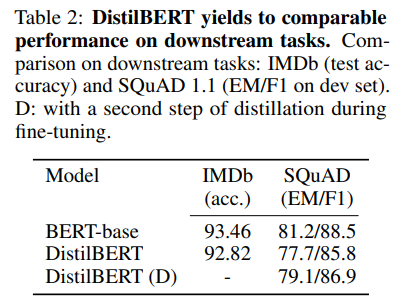

Por otro lado, observamos que el modelo DistilBERT, presenta un valor de precission más alto, lo que indica que se etiquetaron incorrectamente como positivos menos ejemplos negativos, por lo tanto, las puntuaciones más altas son mejores de forma genérica.

Se dice de forma genérica, ya que esta última métrica viene expresada por la siguiente ecuación: Precisión = TP / (TP + FP); donde TP son los Verdaderos positivos (es decir, los ejemplos etiquetados correctamente como positivos) y FP son los Ejemplos falsos positivos (es decir, los ejemplos etiquetados incorrectamente como positivos).

Esto quiere decir, que si en el denominador, encontramos muchos Falsos Positivos, la métrica de Precisión puede ser que se encuentre inflada. En este caso concreto, puesto que el Accuricy, que es la métrica principal de medición, indica que el DistilBERT no ha sido tan exacto, puede ser que la métrica de precisión no nos arroje un valor fiable.

Este mismo ocurre con la medida f1, la cual mide la relación entre la precisión y el recall (Mide la proporción de verdaderos positivos entre todos los positivos reales. Indica qué porcentaje de las instancias positivas reales han sido capturadas por el modelo. Recall = TP / (TP + FN)). Por ende, solo hemos tomado como métrica valorable el **Accuricy**, siguiendo la línea del articulo estudiado.


En conclusión, se han obtenido datos muy válidos, similares a los conseguidos en el artículo, que nos han permitido validar esta breve experimentación, y el proceso de preentrenamiento de los modelos.

Gracias a esta experimentación, se han conseguido los siguientes conocimientos y habilidades:

*   Entendimiento de los conceptos básicos y avanzados de los modelos de lenguaje grande, incluyendo BERT y DistilBERT.

* Preparación y despliegue de modelos en plataformas como Hugging Face Hub, así como el uso de APIs y herramientas de Hugging Face para compartir y utilizar modelos entrenados.

* Uso de la biblioteca transformers de Hugging Face para trabajar con modelos de lenguaje, comprendiendo el proceso de configuración y uso de pipelines para tareas específicas de procesamiento de lenguaje natural.

* Uso de la biblioteca datasets de Hugging Face para cargar y manipular conjuntos de datos.

* Uso de la biblioteca evaluate de Hugging Face para combinar y calcular métricas de evaluación, consiguiendo la comprensión de las métricas de evaluación comunes como accuricy, F1 score, precisión (precision) y recall, y consiguiendo obtenerlas mediante métodos para evaluar el rendimiento de los modelos de clasificación de texto.

